In [100]:
print("hello world")

hello world


In [101]:
pip install opencv-contrib-python



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [102]:
from sklearn.datasets import make_blobs
import numpy as np
from pandas import DataFrame
from matplotlib import pyplot as plt 
from matplotlib.pyplot import figure 
import random
import cv2


Setting Standard Seed

In [103]:
random.seed(7) #this generates the random numbers with the fixed seed which means it will generate the same random numbers 
np.random.seed(7)

Creating Sythetic Data 

In [104]:
x_train, _= make_blobs(n_samples= 1000 , n_features= 2, centers= 3, random_state= 20)
print(type(x_train))

'''we use scikit-learn's make_blobs function to generate random data points. 
In the first call to make_blobs, we don't specify random_state, so the data will be different each time we run the code. 
In the second call, we specify random_state=42, ensuring that we get the same data points every time we run the code.'''


<class 'numpy.ndarray'>


"we use scikit-learn's make_blobs function to generate random data points. \nIn the first call to make_blobs, we don't specify random_state, so the data will be different each time we run the code. \nIn the second call, we specify random_state=42, ensuring that we get the same data points every time we run the code."

Visualization of Data

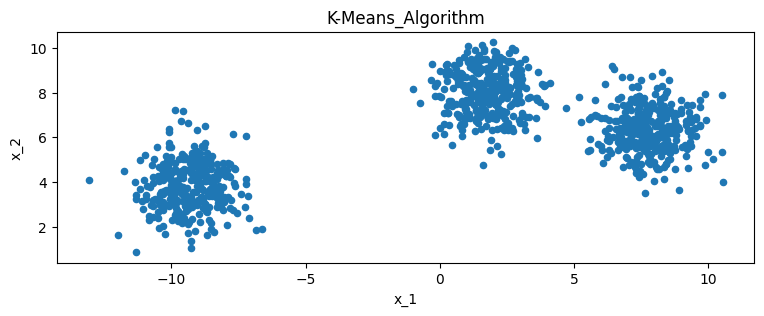

In [105]:
df = DataFrame(dict(x = x_train[:,0], y =x_train[:, 1]))

fig, ax = plt.subplots(figsize = ( 9,3))
df.plot(ax = ax , kind = 'scatter', x = 'x', y = 'y')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title("K-Means_Algorithm")
plt.show()


Initializing Functions 

In [106]:
def get_initial_centroids(x, k):
    " x is nd.array training data , k is cetroids which will be selected from x"
    number_of_smaples = x.shape[0]
    sample_point_ids = random.sample(range(0, number_of_smaples), k) # it will generate the idexes of centroids 
    centroids = [tuple(x[id]) for id in sample_point_ids]
    unique_centroids = list(set(centroids))  # to detlete the dupllicates 
    number_of_unique_centroids = len(unique_centroids)

    while number_of_unique_centroids < k :
        new_sample_point_ids = random.sample(range(0, number_of_smaples), k - number_of_unique_centroids)
        new_centroids = [tuple(x[id] for id in new_sample_point_ids)]
        unique_centroids = list(set(new_centroids + unique_centroids))
        number_of_unique_centroids = len(unique_centroids)

    return np.array(unique_centroids)

Example with ndArray 

In [107]:
x = np.array([[1,1,1], [2,2,2], [3,3,3], [4,4,4]])

k = 2
print(f"Dataset:\n {x}")
print(f"Datashape : {x.shape}")
print(f"for given {k} we got initial centroids :{get_initial_ceters(x, k)}")

Dataset:
 [[1 1 1]
 [2 2 2]
 [3 3 3]
 [4 4 4]]
Datashape : (4, 3)
for given 2 we got initial centroids :[[1 1 1]
 [3 3 3]]


In [108]:
def get_euclidean_distance(A_matrix, B_matrix):
    """
    Function computes euclidean distance between matrix A and B.
    E. g. C[2,15] is distance between point 2 from A (A[2]) matrix and point 15 from matrix B (B[15])
    Args:
        A_matrix (numpy.ndarray): Matrix size N1:D
        B_matrix (numpy.ndarray): Matrix size N2:D

    Returns:
        numpy.ndarray: Matrix size N1:N2
    """
    A_square = np.reshape(np.sum(A_matrix * A_matrix, axis= 1), (A_matrix.shape[0], 1)) #means sum of squares of elements of each row alonb coloumn
    B_square = np.reshape(np.sum(B_matrix * B_matrix, axis= 1), (1,B_matrix.shape[0]))  # it reshapes the matrix 
    AB = A_matrix @ B_matrix.T
    C = -2*AB + A_square + B_square 

    return np.sqrt(C)
   

Lets try with an Example 

In [109]:
A = np.array([[1,2], [2, 3], [3,4], [5,6], [1,1], [3,0]])
B = np.array([[0,1], [2,0], [1,4],[1,6]])

print(f"A :\n {A}")
print(f"B :\n {B}")
print(f"Euclidean distance between A and B is:\n {get_euclidean_distance(A,B)}")

A :
 [[1 2]
 [2 3]
 [3 4]
 [5 6]
 [1 1]
 [3 0]]
B :
 [[0 1]
 [2 0]
 [1 4]
 [1 6]]
Euclidean distance between A and B is:
 [[1.41421356 2.23606798 2.         4.        ]
 [2.82842712 3.         1.41421356 3.16227766]
 [4.24264069 4.12310563 2.         2.82842712]
 [7.07106781 6.70820393 4.47213595 4.        ]
 [1.         1.41421356 3.         5.        ]
 [3.16227766 1.         4.47213595 6.32455532]]


Finding New Clusters 

In [110]:
#initializing a dict with empty lists 
f = {}
for i in range(10):
    f[i] = []
print(f)

{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: []}


In [111]:
def get_clusters(x ,centroids, distance_measuring_method):
    k = centroids.shape[0]
    clusters = {}
    distance_matrix = distance_measuring_method(x, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis= 1) # its a index of 
    for i in range(k):
        clusters[i] = []
    for i , cluster_id in enumerate(closest_cluster_ids):
        clusters[cluster_id].append(x[i])
    return clusters 

        

Example 

In [112]:
A = np.array([[1,2], [2, 3], [3,4], [5,6], [1,1], [3,0]])
B = np.array([[0,1], [2,0], [1,4],[1,6]])

print(f"assigned data points with respective clustes:\n {get_clusters(A, B, get_euclidean_distance)}")

assigned data points with respective clustes:
 {0: [array([1, 2]), array([1, 1])], 1: [array([3, 0])], 2: [array([2, 3]), array([3, 4])], 3: [array([5, 6])]}


Check if cluster changed 

In [113]:
#Din't understand it properly 
def has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta):
    """
    Function checks if any of centroids moved more then MOVEMENT_THRESHOLD_DELTA if not we assume the centroids were founded
    Args:
        previous_centroids (numpy.ndarray): array of k old centroids, size K:D
        new_centroids (numpy.ndarray): array of k new centroids, size K:D
        distance_mesuring_method (function): function taking 2 Matrices A (N1:D) and B (N2:D) and returning distance
        movement_threshold_delta (float): threshold value, if centroids move less we assume that algorithm covered


    Returns: boolean True if centroids coverd False if not

    """
    distances_between_old_and_new_centroids = distance_mesuring_method(previous_centroids, new_centroids)
    centroids_covered = np.max(distances_between_old_and_new_centroids.diagonal()) <= movement_threshold_delta

    return centroids_covered

Merge All the Steps and Perfome K-Mean Algorithm

In [114]:
import numpy as np

# Define the clusters dictionary
clusters = {0: [np.array([1, 2]), np.array([1, 1])], 1: [np.array([3, 0])], 2: [np.array([2, 3]), np.array([3, 4])], 3: [np.array([5, 6])]}

# Calculate the new centroids
new_centroids = np.array([np.mean(clusters[key], axis=0) for key in sorted(clusters.keys())])

# Print the new centroids
print(new_centroids)
print(np.mean(clusters[key]) for key in sorted(clusters.keys()))

[[1.  1.5]
 [3.  0. ]
 [2.5 3.5]
 [5.  6. ]]
<generator object <genexpr> at 0x17fadb140>


In [115]:
def perform_k_means_algorithm(X, k, distance_mesuring_method, movement_threshold_delta=0):
    """
    Function performs k-means algorithm on a given dataset, finds and returns k centroids
    Args:
        X (numpy.ndarray) : dataset points array, size N:D
        distance_mesuring_method (function): function taking 2 Matrices A (N1:D) and B (N2:D) and returning distance
        between all points from matrix A and all points from matrix B, size N1:N2.
        k (int): number of centroids
        movement_threshold_delta (float): threshold value, if centroids move less we assume that algorithm covered

    Returns:
        (numpy.ndarray): array of k centroids, size K:D
    """

    new_centroids = get_initial_centroids(x, k)

    centroids_covered = False

    while not centroids_covered:
        previous_centroids = new_centroids
        clusters = get_clusters(X, previous_centroids, distance_mesuring_method)

        new_centroids = np.array([np.mean(clusters[key], axis=0, dtype=X.dtype) for key in sorted(clusters.keys())])

        centroids_covered = has_centroids_covered(previous_centroids, new_centroids, distance_mesuring_method, movement_threshold_delta)

    return new_centroids

Perfoming on photo to remove the colours 


In [116]:
def get_reduced_colors_image(image, number_of_colors):
    """
    Function returns given image with reduced number of colors
    Args:
        image (numpy.ndarray): original opencv image, function finds its reduced colors form
        number_of_colors (integer): number of colors in reduced image

    Returns:
        (numpy.ndarray): image with reduced number of colors
    """

    h, w, d = image.shape

    X = np.reshape(image, (h * w, d))
    X = np.array(X, dtype=np.int32)

    centroids = perform_k_means_algorithm(X, k=number_of_colors, distance_mesuring_method=get_euclidean_distance)
    distance_matrix = get_euclidean_distance(X, centroids)
    closest_cluster_ids = np.argmin(distance_matrix, axis=1)

    X_reconstructed = centroids[closest_cluster_ids]
    X_reconstructed = np.array(X_reconstructed, dtype=np.uint8)
    reduced_image = np.reshape(X_reconstructed, (h, w, d))

    return reduced_image

[[[168 168 168]
  [166 166 166]
  [165 165 165]
  ...
  [168 168 168]
  [168 168 168]
  [168 168 168]]

 [[166 166 166]
  [165 165 165]
  [164 164 164]
  ...
  [168 168 168]
  [168 168 168]
  [168 168 168]]

 [[162 162 162]
  [162 162 162]
  [163 163 163]
  ...
  [169 169 169]
  [169 169 169]
  [169 169 169]]

 ...

 [[154 154 154]
  [155 155 155]
  [157 157 157]
  ...
  [170 170 170]
  [170 170 170]
  [170 170 170]]

 [[155 155 155]
  [156 156 156]
  [158 158 158]
  ...
  [170 170 170]
  [170 170 170]
  [170 170 170]]

 [[156 156 156]
  [157 157 157]
  [159 159 159]
  ...
  [170 170 170]
  [170 170 170]
  [170 170 170]]]


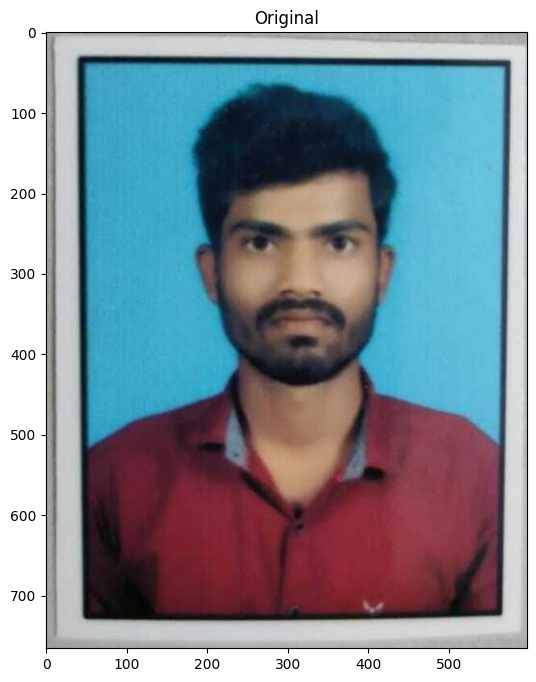

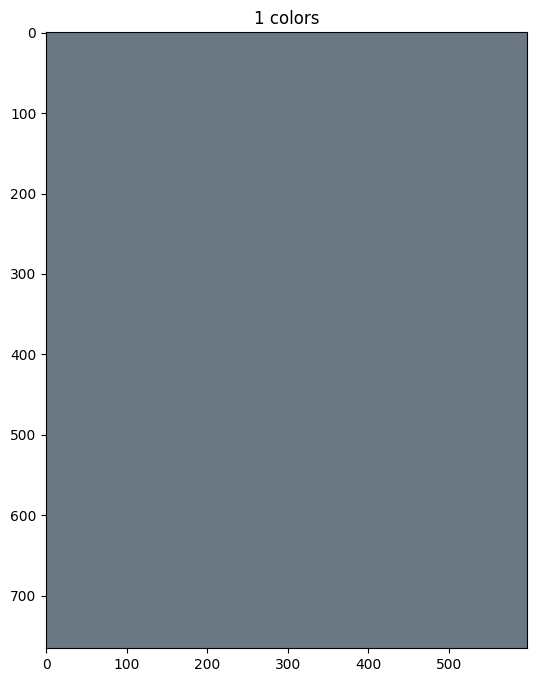

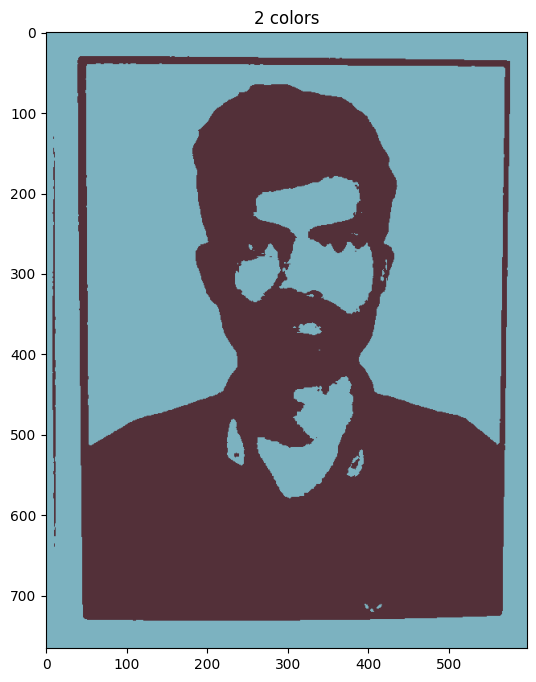

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in cast
  ret = ret.dtype.type(ret / rcount)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [118]:
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 32, 64]

reconstrutons = [] 


img = cv2.imread("aravind.jpeg")
print(img)
plt.rcParams['figure.figsize'] = [15, 8]
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.show()

for k in k_values:
    reduced_colors_image = get_reduced_colors_image(img, k)
    plt.title(f"{k} colors")
    plt.imshow(cv2.cvtColor(reduced_colors_image, cv2.COLOR_BGR2RGB))
    plt.show()
    reconstrutons.append(reduced_colors_image)